In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import cv2
import os
import glob
from PIL import Image, ImageDraw, ImageFilter, ImageColor
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import math

In [2]:
import numpy as np
import cv2
from scipy.optimize import differential_evolution

def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

In [3]:
def SortCircles(cir):
  circles=cir[0]
  circles = circles[np.argsort(circles[:, 0])]
  #print(circles)
  NCir = []
  Cir1 = []
  NCrpi1 = []
  for i in range(4):
    NCir=np.argsort(circles[6*i:(6 * (i+1)), 1])
    for j in range(6):
      #print(circles1[(i*6)+NCir[j] , :])
      Cir1.append(circles[(i*6)+NCir[j] , :])


  Cir1 = np.array(Cir1)
  #print(Cir1)
  return(Cir1)

## Detección del paleta y sus círculos

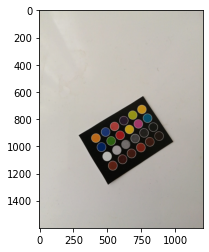

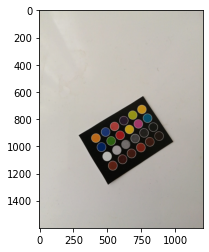

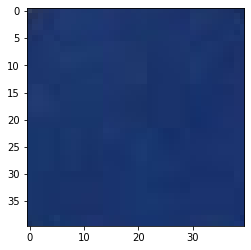

In [4]:
Pal = cv2.imread("PaletaMini.jpeg")
Pal = cv2.cvtColor(Pal, cv2.COLOR_BGR2RGB) 
#Pal = ndimage.rotate(Pal,30)
plt.figure()
plt.imshow(Pal)
plt.show()

gray = cv2.cvtColor(Pal, cv2.COLOR_RGB2GRAY)
img = cv2.medianBlur(gray, 5)

cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

#circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT,1,80,param1=50,param2=13,minRadius=80,maxRadius=100)
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT,1,40,param1=100,param2=30,minRadius=30,maxRadius=50)
circles = np.uint16(np.around(circles))
n1 = circles.shape[1]
circles = SortCircles(circles)
circles = np.array([circles])
circlesaux1 = circles

crpi = []
for i in circles[0,:]:

  #cv2.circle(Pal, (i[0], i[1]), i[2], (255,0,0), 8)  

  r=i[2]
  x=int(i[0]-r+r/3+r/10)
  y=int(i[1]-r+r/3+r/10)
  
  crpi.append(Pal[y:int((y+((r-r/3-r/15)*2))), x:int((x+(2*(r-r/3-r/15))))]) 


plt.figure()
plt.imshow(Pal)
plt.show()

plt.figure()
plt.imshow(crpi[0])
plt.show()

## Evolución diferencial

In [ ]:
from scipy import ndimage
from scipy.optimize import differential_evolution
def funcion_minimizar(theta,args):
  img = args[0]
  print("Debugg")
  imgn = ndimage.rotate(img, math.degrees(theta)) 
  
  # <- Investigar está función.. la idea es que gire la imagen de acuerdo al ángulo theta
  # Calcular las pociones de los circulos en imgn y guardarlos en X
  # X es una matriz de nx2, donde n es el número de circulos
  # Ordenar las posiciones en X de menor a mayor.. deben quedar ordenados de acuerdo a la primer columna
  X = DetectCircles(imgn)[0]
  n = 6
  varianza  = np.var( X[n*0:n*1,0] )
  varianza += np.var( X[n*1:n*2,0] )
  varianza += np.var( X[n*2:n*3,0] )
  varianza += np.var( X[n*3:n*4,0] )
  # Sólo confirmar.. cuántos circulos deben tener el valor máso menos igual
  return varianza

bounds = [0, 2*3.1416]
theta = differential_evolution(funcion_minimizar,bounds,args=(img)).x
print('theta',m)

# Verificación
imgn = img.rotate(theta) #checar la sintaxis de esta funcion

## Función para detectar círculos en una paleta, regresa los círulos ordenados por fila

In [ ]:
def DetectCircles(Pal):
  #plt.figure()
  #plt.imshow(Pal)
  #plt.show()

  gray = cv2.cvtColor(Pal, cv2.COLOR_RGB2GRAY)
  img = cv2.medianBlur(gray, 5)

  cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

  #circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT,1,80,param1=50,param2=13,minRadius=80,maxRadius=100)
  circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT,1,40,param1=100,param2=30,minRadius=30,maxRadius=50)
  circles = np.uint16(np.around(circles))
  n1 = circles.shape[1]
  circles = SortCircles(circles)
  circles = np.array([circles])
  return circles
